# Campo de gravidade e a superfície geoidal

Notebook que mostrará o campo de gravidade para o mundo inteiro, bem como a superfície geoidal. Estes cálculos irão servir para interpretarmos como o campo varia geograficamente e, posteriormente, calcularmos o distúrbio de gravidade. 

## Importando bibliotecas

Importando as bibliotecas que serão utilizadas para manipulação e visualização dos dados de gravidade.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import harmonica as hm
import pygmt 

## Carregando os dados do modelo geopotencial XGM2019e

Dados baixados do [*International Center for Global Earth Models* (ICGEM)](http://icgem.gfz-potsdam.de/home).

In [2]:
fname = 'dataset/earth_gravity_XGM2019e.gdf'

In [3]:
data = hm.load_icgem_gdf(fname)

In [4]:
data

<xarray.Dataset> Size: 1MB
Dimensions:        (latitude: 181, longitude: 361)
Coordinates:
  * longitude      (longitude) float64 3kB -180.0 -179.0 -178.0 ... 179.0 180.0
  * latitude       (latitude) float64 1kB -90.0 -89.0 -88.0 ... 88.0 89.0 90.0
Data variables:
    h_over_geoid   (latitude, longitude) float64 523kB 2.745e+03 ... 0.0
    gravity_earth  (latitude, longitude) float64 523kB 9.824e+05 ... 9.832e+05
Attributes: (12/32)
    generating_institute:  gfz-potsdam
    generating_date:       2023/03/22
    product_type:          gravity_field
    body:                  earth
    modelname:             XGM2019e_2159
    max_used_degree:       2190
    ...                    ...
    maxvalue:              9.8330378E+05 mgal
    minvalue:              9.7684704E+05 mgal
    signal_wrms:           1.5242402E+03 mgal
    grid_format:           long_lat_height_value
    attributes:            longitude latitude h_over_geoid gravity_earth
    attributes_units:      deg. deg. meter mgal

### Armazenando os dados em um array

In [5]:
lat = data.latitude
lon = data.longitude
gravity = data.gravity_earth

### Campo de gravidade para o mundo inteiro

grdgradient [WARNING]: Longitude range too small; geographic boundary condition changed to natural.
grdimage [WARNING]: Longitude range too small; geographic boundary condition changed to natural.


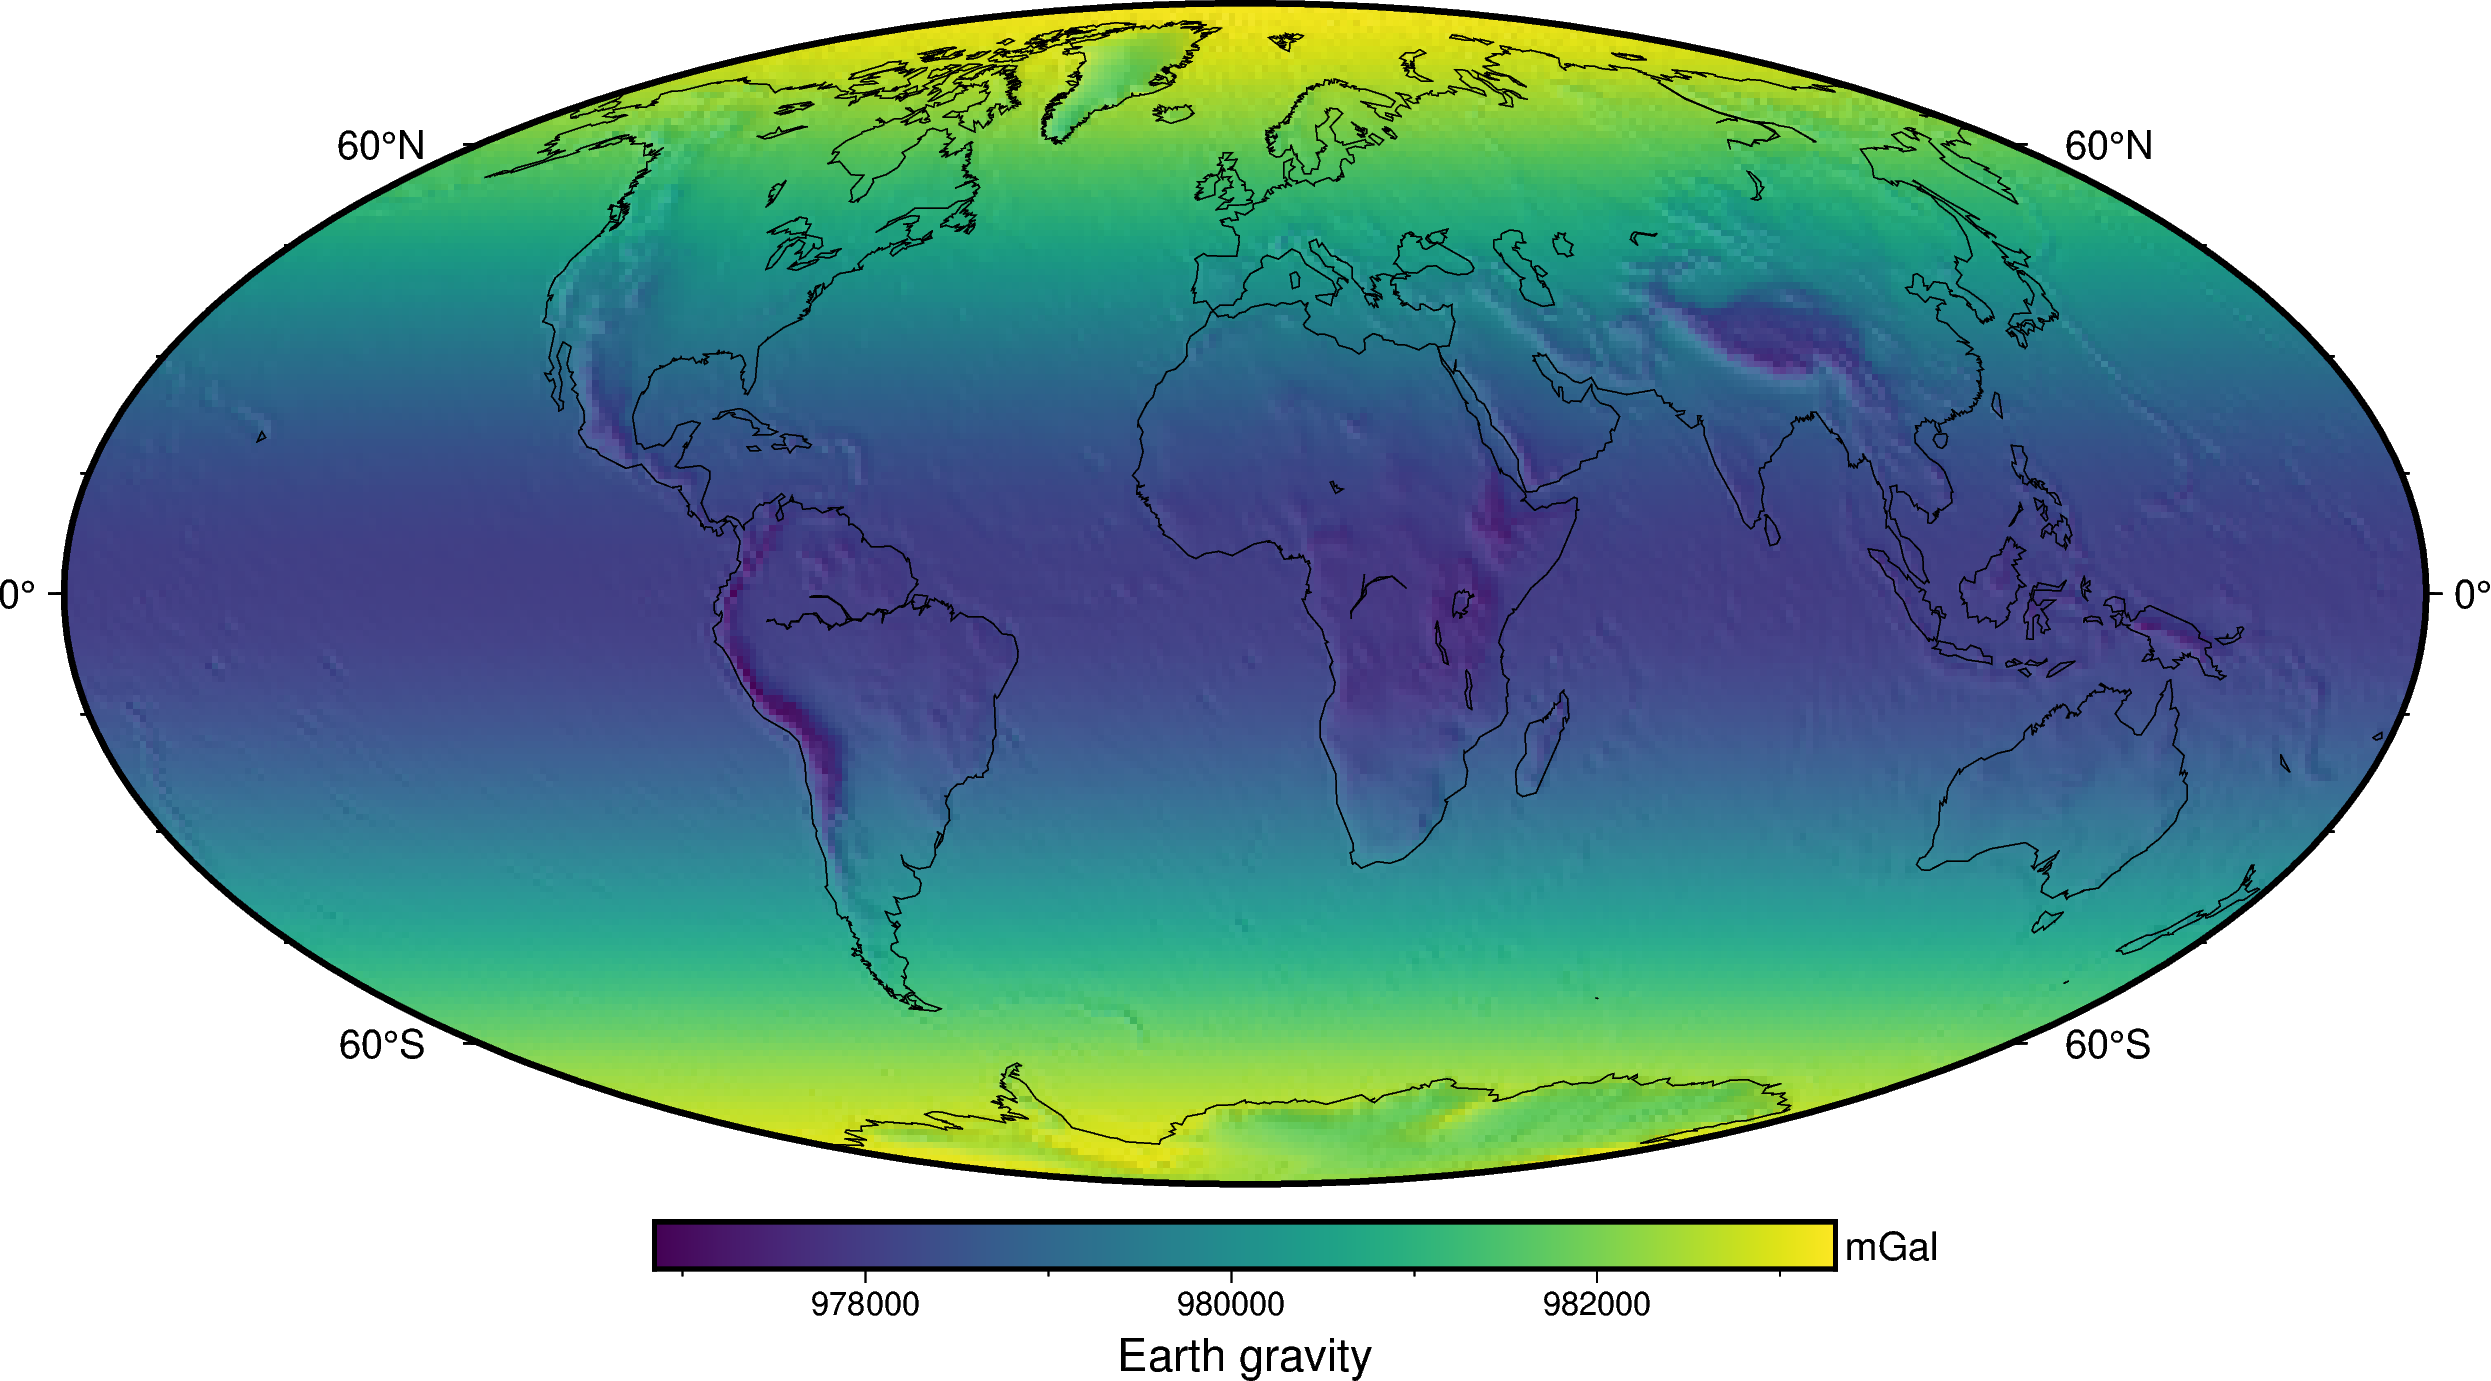

In [6]:
fig = pygmt.Figure()
fig.grdimage(
    gravity,
    projection="W20c",
    cmap="viridis",
    shading="+a45+nt0.2",
)
fig.basemap(frame=["af", "WEsn"])
fig.colorbar(
    position="JCB+w10c",
    frame=["af", 'y+l"mGal"', 'x+l"Earth gravity"'],
)
fig.coast(shorelines=True, resolution="c", area_thresh=1e4)
fig.savefig('images/earth_gravity.png', dpi=200)
fig.show()


## Superfície Geoidal 

In [7]:
fname = 'dataset/geoid_XGM2019e.gdf'

In [8]:
data = hm.load_icgem_gdf(fname)

In [9]:
data

<xarray.Dataset> Size: 527kB
Dimensions:    (latitude: 181, longitude: 361)
Coordinates:
  * longitude  (longitude) float64 3kB -180.0 -179.0 -178.0 ... 179.0 180.0
  * latitude   (latitude) float64 1kB -90.0 -89.0 -88.0 -87.0 ... 88.0 89.0 90.0
Data variables:
    geoid      (latitude, longitude) float64 523kB -28.58 -28.58 ... 15.22 15.22
Attributes: (12/34)
    generating_institute:  gfz-potsdam
    generating_date:       2021/11/09
    product_type:          gravity_field
    body:                  earth
    modelname:             XGM2019e_2159
    max_used_degree:       2190
    ...                    ...
    maxvalue:              8.4768562E+01 meter
    minvalue:              -1.0611542E+02 meter
    signal_wrms:           3.0586679E+01 meter
    grid_format:           long_lat_value
    attributes:            longitude latitude geoid
    attributes_units:      deg. deg. meter

In [10]:
geoid = data.geoid

### Visualização da superfície geoidal

grdgradient [WARNING]: Longitude range too small; geographic boundary condition changed to natural.
grdimage [WARNING]: Longitude range too small; geographic boundary condition changed to natural.


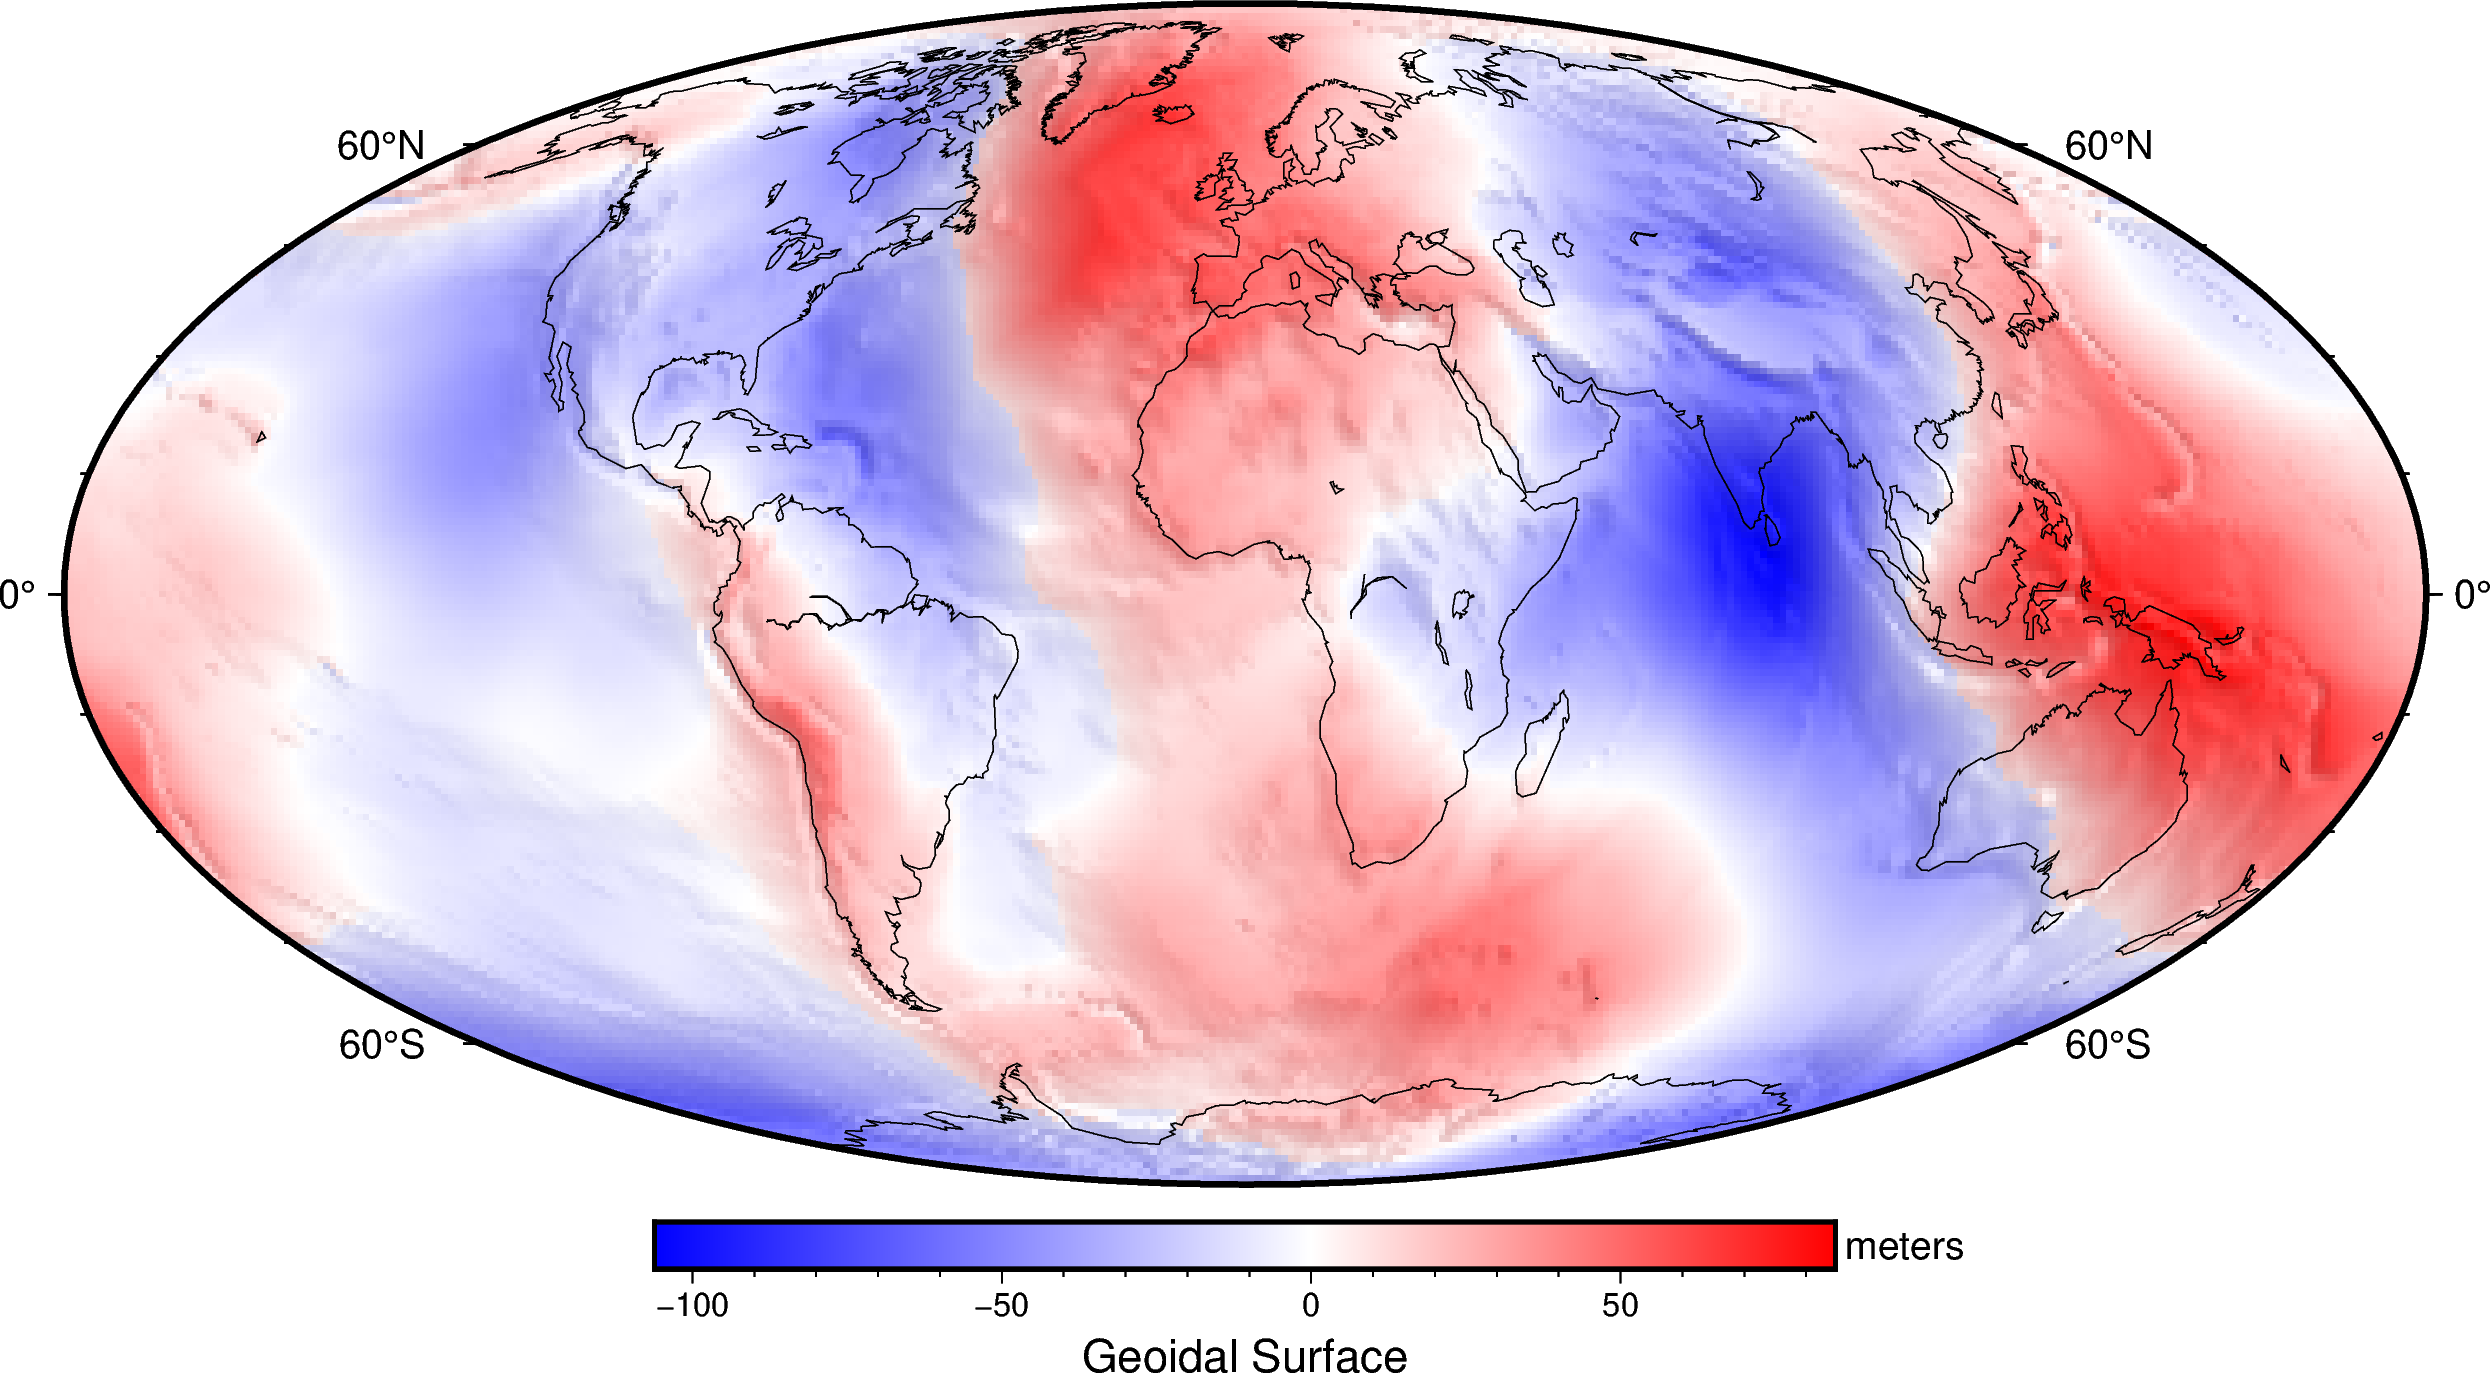

In [11]:
fig = pygmt.Figure()
fig.grdimage(
    geoid,
    projection="W20c",
    cmap="polar+h",
    shading="+a45+nt0.2",
)
fig.basemap(frame=["af", "WEsn"])
fig.colorbar(
    position="JCB+w10c",
    frame=["af", 'y+l"meters"', 'x+l"Geoidal Surface"'],
)
fig.coast(shorelines=True, resolution="c", area_thresh=1e4)
fig.savefig('images/geoidal_surface.png', dpi=300)
fig.show()